## Bike sales EDA part 2

In [1]:
import pandas as pd

df = pd.read_csv("../../data/Sales.csv", index_col=0, parse_dates=True)
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## dates

In [ ]:
# mutate existing dataframe
# same as df = df.sort_index()
df.sort_index(inplace=True)

In [ ]:
df.loc["2013-01-01": "2013-01-02"]

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-01-01,1,January,2013,29,Young Adults (25-34),F,United States,Florida,Bikes,Road Bikes,"Road-650 Red, 62",1,487,783,257,487,744
2013-01-01,1,January,2013,29,Young Adults (25-34),M,United States,Oregon,Bikes,Road Bikes,"Road-650 Black, 44",1,487,783,186,487,673
2013-01-01,1,January,2013,19,Youth (<25),F,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,620,2171,2791
2013-01-01,1,January,2013,53,Adults (35-64),F,France,Seine (Paris),Bikes,Road Bikes,"Road-250 Black, 44",1,1555,2443,448,1555,2003
2013-01-01,1,January,2013,42,Adults (35-64),M,Australia,Queensland,Bikes,Road Bikes,"Road-350-W Yellow, 48",1,1083,1701,346,1083,1429
2013-01-01,1,January,2013,36,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,1008,1266,2274
2013-01-01,1,January,2013,27,Young Adults (25-34),F,Australia,New South Wales,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,261,713,974
2013-01-01,1,January,2013,37,Adults (35-64),F,Germany,Hamburg,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,717,1555,2272
2013-01-02,2,January,2013,37,Adults (35-64),F,United Kingdom,England,Bikes,Road Bikes,"Road-350-W Yellow, 48",1,1083,1701,550,1083,1633


In [11]:
df.loc["2013"]["Country"].value_counts()

Country
United States     8511
Australia         5335
Canada            3086
United Kingdom    2966
France            2291
Germany           2254
Name: count, dtype: int64

## profit per age group

In [22]:
import duckdb

df_small_groups = duckdb.query(
    """
    SELECT
        age_group,
        customer_gender,
        country,
        SUM(profit) AS Total_Profit,
        COUNT(*) AS Number_Rows
    FROM
        df
    GROUP BY
        age_group, customer_gender, country
    HAVING
        number_rows < 1000
    ORDER BY
        Total_Profit DESC
"""
).df()

df_small_groups

,Age_Group,Customer_Gender,Country,Total_Profit,Number_Rows
0,Youth (<25),M,Germany,218274.0,864
1,Youth (<25),F,Germany,217009.0,844
2,Youth (<25),M,France,180075.0,746
3,Youth (<25),F,France,172387.0,844
4,Seniors (64+),M,United States,29603.0,168
5,Seniors (64+),F,United States,27084.0,110
6,Seniors (64+),F,Canada,12187.0,66
7,Seniors (64+),M,Australia,11432.0,42
8,Seniors (64+),M,Germany,11361.0,68
9,Seniors (64+),F,United Kingdom,11296.0,56


In [27]:
df_senior_female = df_small_groups.query("Age_Group == 'Seniors (64+)' and Customer_Gender == 'F'")
df_senior_female

,Age_Group,Customer_Gender,Country,Total_Profit,Number_Rows
5,Seniors (64+),F,United States,27084.0,110
6,Seniors (64+),F,Canada,12187.0,66
9,Seniors (64+),F,United Kingdom,11296.0,56
12,Seniors (64+),F,Australia,6489.0,16
13,Seniors (64+),F,France,4323.0,48
14,Seniors (64+),F,Germany,3676.0,38


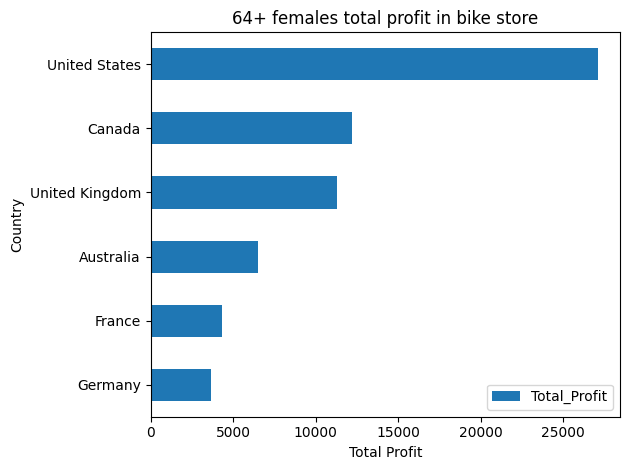

In [34]:
ax = df_senior_female.plot(kind="barh", x="Country", y="Total_Profit")
ax.set(
    title="64+ females total profit in bike store",
    xlabel="Total Profit",
    ylabel="Country",
)

ax.invert_yaxis()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("profit_per_country_senior_females.png", dpi = 200)